In [46]:
import os
os.environ['R_HOME'] = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
from rpy2.rinterface_lib import openrlib
openrlib.R_HOME = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
import scanpy as sc
import matplotlib.pyplot as plt

In [6]:
adata = sc.read_h5ad('./data/scrna_il10_dep_tumor_T.h5ad')

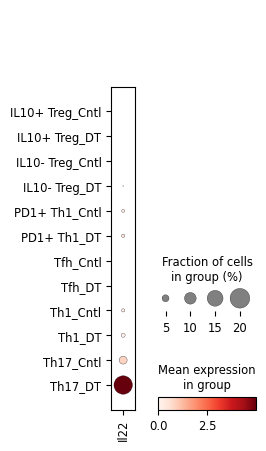

In [12]:
adata_cd4 = adata[adata.obs['celltype'].isin(['IL10- Treg', 'Th1', 'PD1+ Th1', 'Tfh', 'Th17', 'IL10+ Treg'])].copy()
sc.pl.dotplot(adata_cd4, ['Il22'], groupby=['celltype', 'sample'])

In [14]:
adata_dep = sc.read_h5ad('./data/scrna_il10_dep_tumor_nonT.h5ad')

In [22]:
celltype_colors = {'B cells': '#b5bd61ff',
 'CD19+ B': '#1f77b4ff',
 'Cytotoxic NKT': '#ffbb78ff',
 'DC': '#ff7f0eff',
 'Granulocyte': '#279e68ff',
 'ILC': '#aec7e8ff',
 'Monocytes': '#aa40fcff',
 'NK': '#17becfff',
 'NKT2': '#d62728ff',
 'Selenop+ macrophage': '#e377c2ff',
 'Spp1+ macrophage': '#8c564bff',
 'mast': '#98df8aff'}

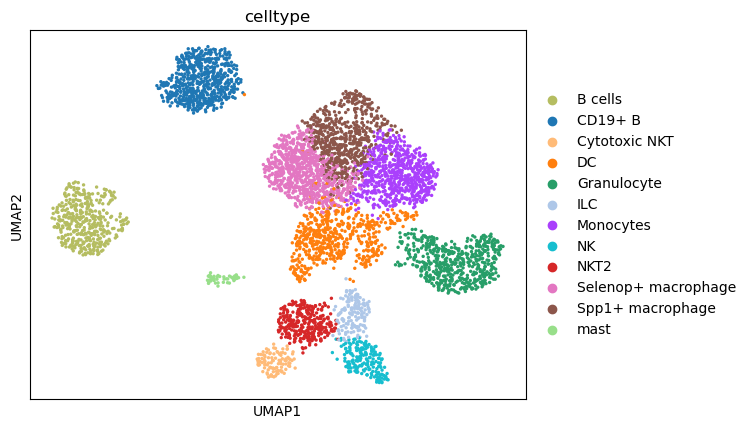

In [23]:
sc.pl.umap(adata_dep, color='celltype', palette=celltype_colors)

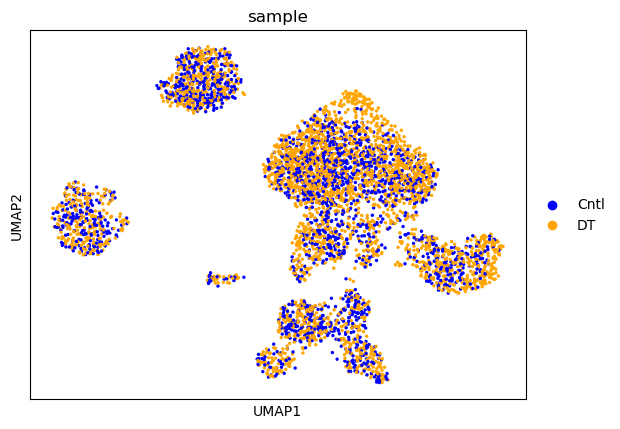

In [25]:
sc.pl.umap(adata_dep, color='sample', palette={'Cntl': '#0000ffff', 'DT': '#ffa500ff'})

In [28]:
%load_ext rpy2.ipython

In [30]:
%%R
library(EnhancedVolcano)

In [31]:
adata_tmp = adata_dep[adata_dep.obs['celltype'].str.contains('Spp1')].copy()
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
sc.tl.rank_genes_groups(adata_tmp, 'sample', group=['DT'], method='wilcoxon', use_raw=False)
diff_genes_tumor_spp1 = sc.get.rank_genes_groups_df(adata_tmp, group='DT').copy()

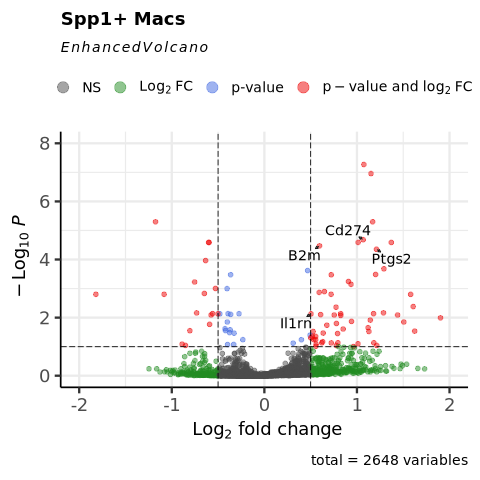

In [34]:
%%R -i diff_genes_tumor_spp1
p <- EnhancedVolcano(diff_genes_tumor_spp1,
                lab=diff_genes_tumor_spp1$names,
                x='logfoldchanges',
                y='pvals_adj',
                pCutoff = 0.1,
                FCcutoff = 0.5,
                selectLab=c('Cd274', 'B2m', 'Ptgs2', 'Il1rn'),
                xlim = c(-2, 2),
                ylim = c(0, -log10(10e-9)),
                drawConnectors=TRUE,
                max.overlaps=Inf,
                title='Spp1+ Macs'
                )
p

In [35]:
adata_tmp = adata_dep[adata_dep.obs['celltype'].str.contains('Selenop')].copy()
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
sc.tl.rank_genes_groups(adata_tmp, 'sample', group=['DT'], method='wilcoxon', use_raw=False)
diff_genes_tumor_selenop = sc.get.rank_genes_groups_df(adata_tmp, group='DT').copy()

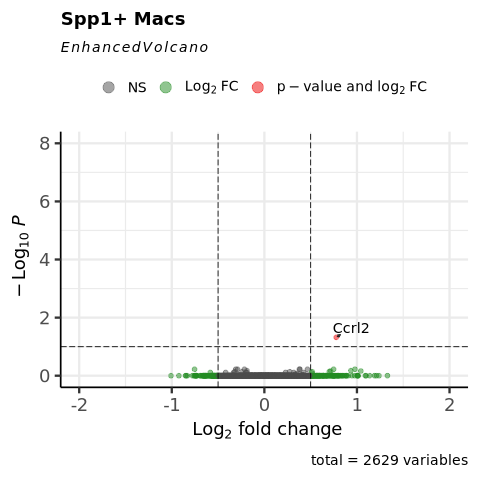

In [36]:
%%R -i diff_genes_tumor_selenop
p <- EnhancedVolcano(diff_genes_tumor_selenop,
                lab=diff_genes_tumor_selenop$names,
                x='logfoldchanges',
                y='pvals_adj',
                pCutoff = 0.1,
                FCcutoff = 0.5,
                xlim = c(-2, 2),
                ylim = c(0, -log10(10e-9)),
                drawConnectors=TRUE,
                title='Spp1+ Macs'
                )
p

In [39]:
adata_tmp = adata_dep[adata_dep.obs['celltype'].str.contains('Monocyte')].copy()
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
sc.tl.rank_genes_groups(adata_tmp, 'sample', group=['DT'], method='wilcoxon', use_raw=False)
diff_genes_tumor_mono = sc.get.rank_genes_groups_df(adata_tmp, group='DT').copy()

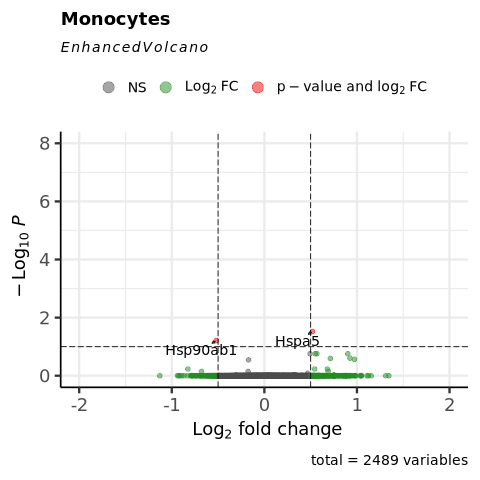

In [40]:
%%R -i diff_genes_tumor_mono
p <- EnhancedVolcano(diff_genes_tumor_mono,
                lab=diff_genes_tumor_mono$names,
                x='logfoldchanges',
                y='pvals_adj',
                pCutoff = 0.1,
                FCcutoff = 0.5,
                xlim = c(-2, 2),
                ylim = c(0, -log10(10e-9)),
                drawConnectors=TRUE,
                title='Monocytes'
                )
p

In [37]:
adata_tmp = adata_dep[adata_dep.obs['celltype'].str.contains('Granulocyte')].copy()
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
sc.tl.rank_genes_groups(adata_tmp, 'sample', group=['DT'], method='wilcoxon', use_raw=False)
diff_genes_tumor_gran = sc.get.rank_genes_groups_df(adata_tmp, group='DT').copy()

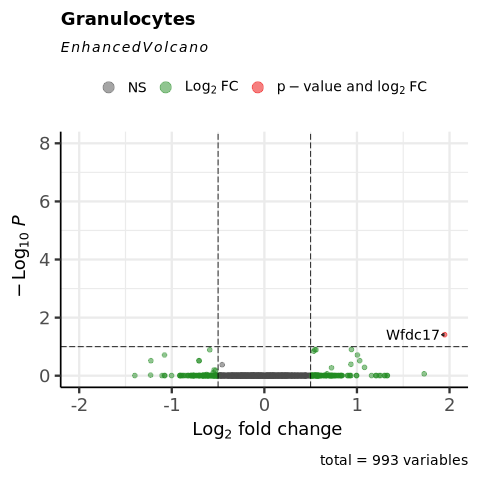

In [38]:
%%R -i diff_genes_tumor_gran
p <- EnhancedVolcano(diff_genes_tumor_gran,
                lab=diff_genes_tumor_gran$names,
                x='logfoldchanges',
                y='pvals_adj',
                pCutoff = 0.1,
                FCcutoff = 0.5,
                # selectLab=c('Il1b', 'Ccl3', 'Cd80', 'Cxcl10', 'Cxcr4', 'Stat1', 'Hif1a', 'Cd274', 'Il10'),
                xlim = c(-2, 2),
                ylim = c(0, -log10(10e-9)),
                drawConnectors=TRUE,
                title='Granulocytes'
                )
p

In [41]:
adata_tmp = adata_dep[adata_dep.obs['celltype'].str.contains('DC')].copy()
adata_tmp.uns['log1p']['base'] = None
sc.pp.filter_genes(adata_tmp, min_cells=0.1*adata_tmp.shape[0])
sc.tl.rank_genes_groups(adata_tmp, 'sample', group=['DT'], method='wilcoxon', use_raw=False)
diff_genes_tumor_dc = sc.get.rank_genes_groups_df(adata_tmp, group='DT').copy()

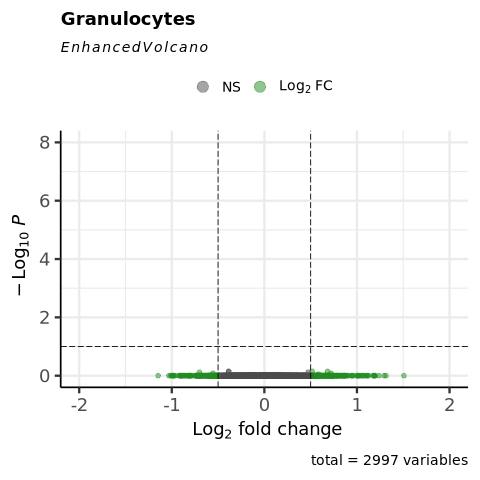

In [42]:
%%R -i diff_genes_tumor_dc
p <- EnhancedVolcano(diff_genes_tumor_dc,
                lab=diff_genes_tumor_dc$names,
                x='logfoldchanges',
                y='pvals_adj',
                pCutoff = 0.1,
                FCcutoff = 0.5,
                xlim = c(-2, 2),
                ylim = c(0, -log10(10e-9)),
                drawConnectors=TRUE,
                title='Granulocytes'
                )
p

/tmp/ipykernel_1326030/3108446380.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['celltype', 'sample']).size().reset_index(name='counts')
/tmp/ipykernel_1326030/3108446380.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_t = adata_dep.obs.groupby(['sample']).size().reset_index(name='total_counts')


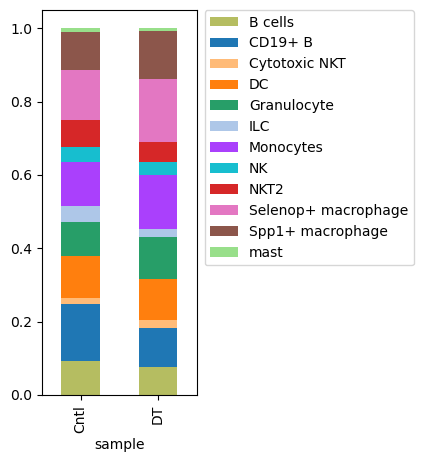

In [51]:
colors = dict(zip(adata_dep.obs['celltype'].cat.categories, adata_dep.uns['celltype_colors']))
df = adata_dep.obs
df = df.groupby(['celltype', 'sample']).size().reset_index(name='counts')
df_t = adata_dep.obs.groupby(['sample']).size().reset_index(name='total_counts')
df = df.merge(df_t, on='sample')
df['pct'] = df['counts']/df['total_counts']
df = df.pivot(index='sample', columns='celltype', values='pct')
plt.figure(figsize=(2,5))
df.plot.bar(stacked=True, color=colors, ax=plt.gca())
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)